In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images = trainX/255
test_images = testX/255

In [4]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [5]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [6]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [7]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

## L1, L2 test

In [8]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [12]:
history_dense_0 = model_dense_0.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 1s 6ms/step - loss: 2.2852 - accuracy: 0.1338
Epoch 2/20
196/195 [==============================] - 1s 6ms/step - loss: 2.2456 - accuracy: 0.1487
Epoch 3/20
196/195 [==============================] - 1s 6ms/step - loss: 2.2230 - accuracy: 0.1466
Epoch 4/20
196/195 [==============================] - 1s 7ms/step - loss: 2.1977 - accuracy: 0.1588
Epoch 5/20
196/195 [==============================] - 1s 7ms/step - loss: 2.1616 - accuracy: 0.1530
Epoch 6/20
196/195 [==============================] - 1s 7ms/step - loss: 2.1273 - accuracy: 0.1803
Epoch 7/20
196/195 [==============================] - 1s 7ms/step - loss: 2.1035 - accuracy: 0.1812
Epoch 8/20
196/195 [==============================] - 1s 7ms/step - loss: 2.0849 - accuracy: 0.1810
Epoch 9/20
196/195 [==============================] - 1s 8ms/step - loss: 2.0713 - accuracy: 0.1814
Epoch 10/20
196/195 [==============================] - 1s 8ms/step - loss: 2.0597 - accuracy: 0.1817

In [17]:
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [19]:
history_dense_1 = model_dense_1.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 2s 9ms/step - loss: 4.5914 - accuracy: 0.1687
Epoch 2/20
196/195 [==============================] - 2s 9ms/step - loss: 2.4204 - accuracy: 0.1815
Epoch 3/20
196/195 [==============================] - 2s 9ms/step - loss: 2.3699 - accuracy: 0.2025
Epoch 4/20
196/195 [==============================] - 2s 9ms/step - loss: 2.3442 - accuracy: 0.2120
Epoch 5/20
196/195 [==============================] - 2s 9ms/step - loss: 2.3177 - accuracy: 0.2260
Epoch 6/20
196/195 [==============================] - 2s 9ms/step - loss: 2.3099 - accuracy: 0.2373
Epoch 7/20
196/195 [==============================] - 2s 9ms/step - loss: 2.2865 - accuracy: 0.2556
Epoch 8/20
196/195 [==============================] - 2s 9ms/step - loss: 2.2689 - accuracy: 0.2640
Epoch 9/20
196/195 [==============================] - 2s 9ms/step - loss: 2.2690 - accuracy: 0.2641
Epoch 10/20
196/195 [==============================] - 2s 9ms/step - loss: 2.2537 - accuracy: 0.2719

In [20]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [22]:
history_dense_2 = model_dense_2.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 2s 11ms/step - loss: 4.9882 - accuracy: 0.1507
Epoch 2/20
196/195 [==============================] - 2s 11ms/step - loss: 2.4314 - accuracy: 0.1900
Epoch 3/20
196/195 [==============================] - 2s 11ms/step - loss: 2.4000 - accuracy: 0.2176
Epoch 4/20
196/195 [==============================] - 2s 11ms/step - loss: 2.3472 - accuracy: 0.2405
Epoch 5/20
196/195 [==============================] - 2s 11ms/step - loss: 2.3117 - accuracy: 0.2567
Epoch 6/20
196/195 [==============================] - 2s 11ms/step - loss: 2.2946 - accuracy: 0.2677
Epoch 7/20
196/195 [==============================] - 2s 11ms/step - loss: 2.2930 - accuracy: 0.2695
Epoch 8/20
196/195 [==============================] - 2s 11ms/step - loss: 2.2758 - accuracy: 0.2741
Epoch 9/20
196/195 [==============================] - 2s 11ms/step - loss: 2.2666 - accuracy: 0.2788
Epoch 10/20
196/195 [==============================] - 2s 11ms/step - loss: 2.2720 - accura

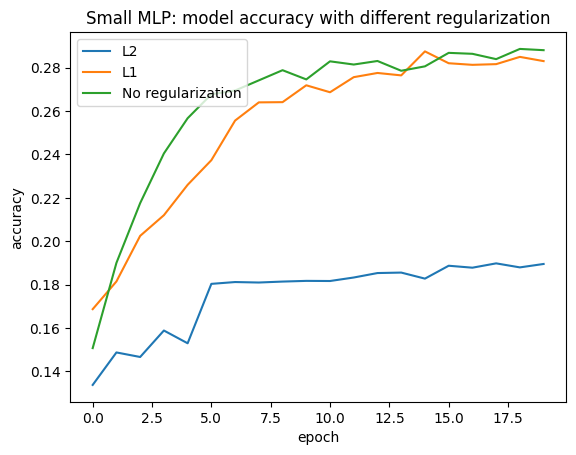

In [24]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['accuracy'])
plt.plot(history_dense_1.history['accuracy'])
plt.plot(history_dense_2.history['accuracy'])
plt.title('Small MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

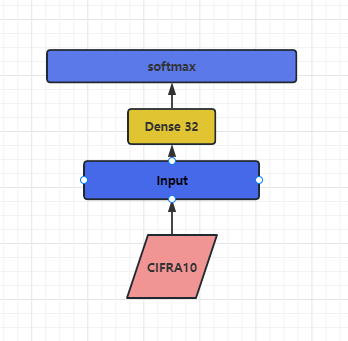